In [1]:
#Load EDA Packages
import pandas as pd
import numpy as np

In [2]:
#Loading for data Visulalization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
!pip install descartes

In [4]:
#Load GeoPandas for geomertic shapes
import geopandas as gpd
from shapely.geometry import Point ,Polygon
import descartes

In [5]:
#Load DataSet
data = pd.read_csv(r"C:\Users\dilpesh\Desktop\covid_19_clean_complete.csv")

In [6]:
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.00000,65.000000,1/22/20,0,0.0,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0.0,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0.0,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0.0,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0.0,0
...,...,...,...,...,...,...,...,...
20614,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,4/9/20,5,0.0,1
20615,Saint Pierre and Miquelon,France,46.88520,-56.315900,4/9/20,1,0.0,0
20616,NaN,South Sudan,6.87700,31.307000,4/9/20,3,0.0,0
20617,NaN,Western Sahara,24.21550,-12.885800,4/9/20,4,0.0,0


In [7]:
#Replace column name with \n
data.columns.str.replace(r'\n','',regex=True)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [8]:
data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [9]:
#Replace columns 
data.rename(columns={'Province/State':'Province_State','Country/Region':'Country_Region'},inplace=True)

In [10]:
data.columns

Index(['Province_State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [11]:
#Shape of Dataset
data.shape

(20619, 8)

In [12]:
#DataTypes
data.dtypes

Province_State     object
Country_Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths            float64
Recovered           int64
dtype: object

In [13]:
#First 10 Dataset
data.head(10)

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0
5,NaN,Antigua and Barbuda,17.0608,-61.7964,1/22/20,0,0.0,0
6,NaN,Argentina,-38.4161,-63.6167,1/22/20,0,0.0,0
7,NaN,Armenia,40.0691,45.0382,1/22/20,0,0.0,0
8,Australian Capital Territory,Australia,-35.4735,149.0124,1/22/20,0,0.0,0
9,New South Wales,Australia,-33.8688,151.2093,1/22/20,0,0.0,0


In [14]:
data = data[['Province_State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered']]

In [15]:
#Check Missing Value
data.isna().sum()

Province_State    14299
Country_Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths               79
Recovered             0
dtype: int64

In [16]:
#Simple describtion of dataset
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,20619.000000,20619.000000,20619.000000,20540.000000,20619.000000
mean,21.456103,22.498687,1066.754789,51.936417,264.376158
std,24.785688,70.687999,10270.328185,611.949579,2890.696704
min,-51.796300,-135.000000,0.000000,0.000000,0.000000
25%,7.000000,-19.020800,0.000000,0.000000,0.000000
50%,23.685000,20.902977,1.000000,0.000000,0.000000
75%,41.204400,81.000000,76.000000,1.000000,3.000000
max,71.706900,178.065000,461437.000000,18279.000000,64187.000000


In [17]:
#Number of Cases per Date/Day
data.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0


In [18]:
data.columns

Index(['Province_State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [19]:
data.groupby('Date')['Confirmed','Deaths', 'Recovered'].sum()

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,555,17.0,28
1/23/20,654,18.0,30
1/24/20,941,26.0,36
1/25/20,1434,42.0,39
1/26/20,2118,56.0,52
...,...,...,...
4/5/20,1272113,69373.0,256997
4/6/20,1345099,74564.0,273256
4/7/20,1426094,81864.0,296259


In [20]:
data.groupby('Date')['Confirmed','Deaths', 'Recovered'].max()

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17.0,28
1/23/20,444,17.0,28
1/24/20,549,24.0,31
1/25/20,761,40.0,32
1/26/20,1058,52.0,42
...,...,...,...
4/5/20,337072,15887.0,63945
4/6/20,366667,16523.0,64014
4/7/20,396223,17127.0,64073


In [21]:
#Number of Cases for per day with first 10 
data_per_day= data.groupby('Date')['Confirmed','Deaths', 'Recovered'].max()

In [22]:
data_per_day.head()

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17.0,28
1/23/20,444,17.0,28
1/24/20,549,24.0,31
1/25/20,761,40.0,32
1/26/20,1058,52.0,42


In [23]:
data_per_day.tail()

,Confirmed,Deaths,Recovered
Date,,,
4/5/20,337072,15887.0,63945
4/6/20,366667,16523.0,64014
4/7/20,396223,17127.0,64073
4/8/20,429052,17669.0,64142
4/9/20,461437,18279.0,64187


In [24]:
data_per_day.describe()

,Confirmed,Deaths,Recovered
count,79.000000,79.000000,79.000000
mean,86960.113924,4330.430380,30996.265823
std,100128.155236,4971.498223,25950.336336
min,444.000000,17.000000,28.000000
25%,32547.000000,1021.000000,2430.500000
50%,66907.000000,2761.000000,31536.000000
75%,67800.000000,4428.500000,58664.000000
max,461437.000000,18279.000000,64187.000000


In [25]:
data.columns

Index(['Province_State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [26]:
#Max Number of Cases
data_per_day[ 'Confirmed'].max()

461437

In [27]:
#Min Number of Cases
data_per_day['Confirmed'].min()

444

In [28]:
#Date for maxmimum Number Cases
data_per_day['Confirmed'].idxmax()

'4/9/20'

In [29]:
#Date for minimum Number Cases
data_per_day['Confirmed'].idxmin()

'1/22/20'

In [30]:
data.columns

Index(['Province_State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [31]:
#Number of Cases per country/Provision
data.groupby(['Province_State','Country_Region'])['Confirmed','Deaths', 'Recovered'].max()

,,Confirmed,Deaths,Recovered
Province_State,Country_Region,,,
Alberta,Canada,1423,29.0,0
Anguilla,United Kingdom,3,0.0,0
Anhui,China,991,6.0,984
Aruba,Netherlands,82,0.0,20
Australian Capital Territory,Australia,100,2.0,47
...,...,...,...,...
Western Australia,Australia,495,6.0,170
Xinjiang,China,76,3.0,73
Yukon,Canada,7,0.0,0


In [32]:
data['Country_Region'].value_counts()

China             2607
Canada            1106
France             869
United Kingdom     869
Australia          632
                  ... 
Slovenia            79
Gambia              79
Malaysia            79
Costa Rica          79
Cabo Verde          79
Name: Country_Region, Length: 184, dtype: int64

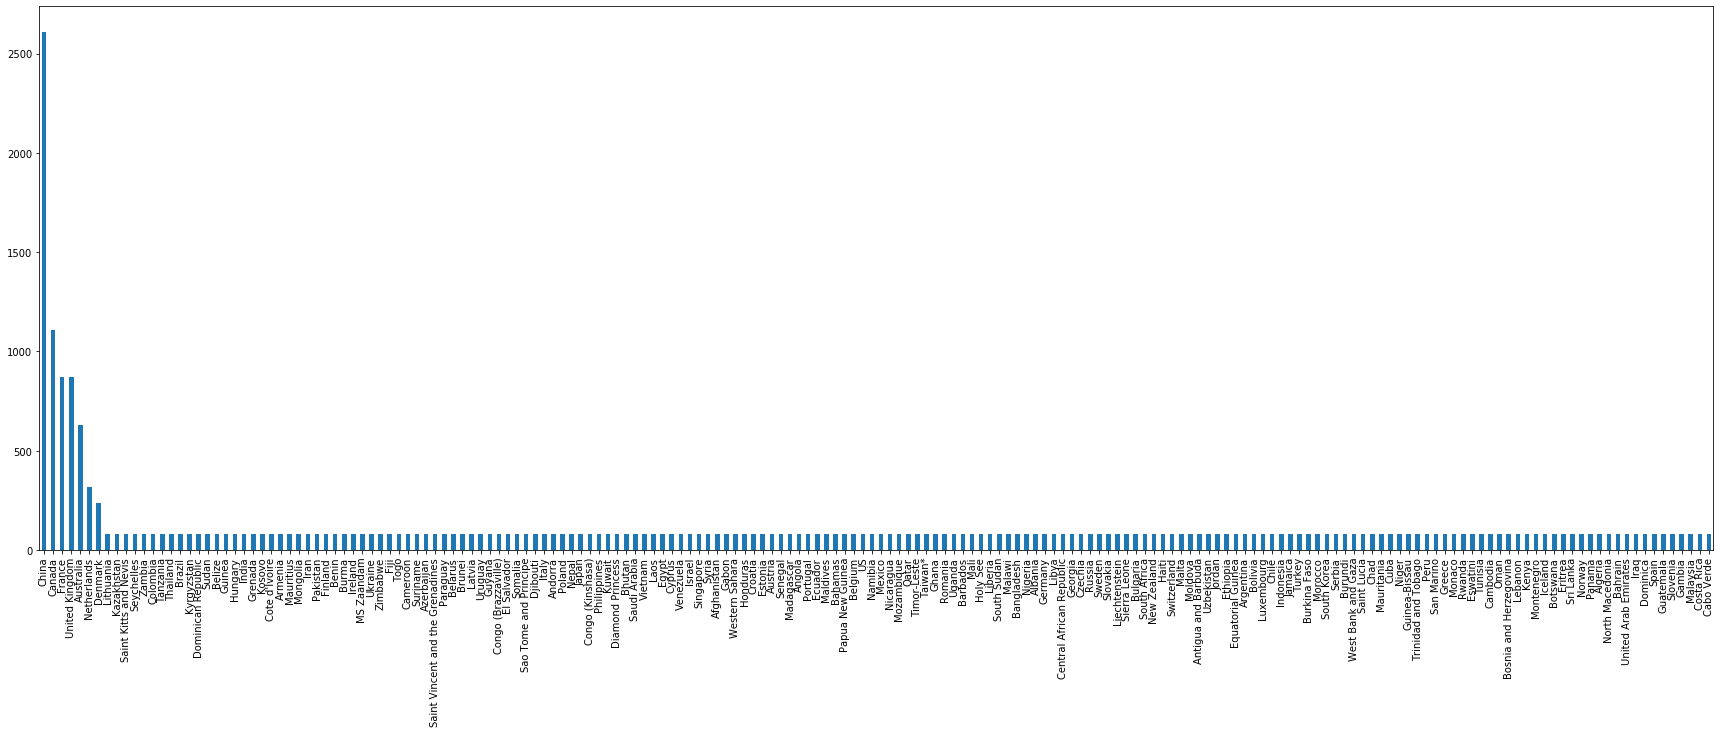

In [33]:
data['Country_Region'].value_counts().plot(kind='bar',figsize=(30,10))

In [34]:
#How many Countrieshave affected
data['Country_Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [35]:
len(data['Country_Region'].unique())

184

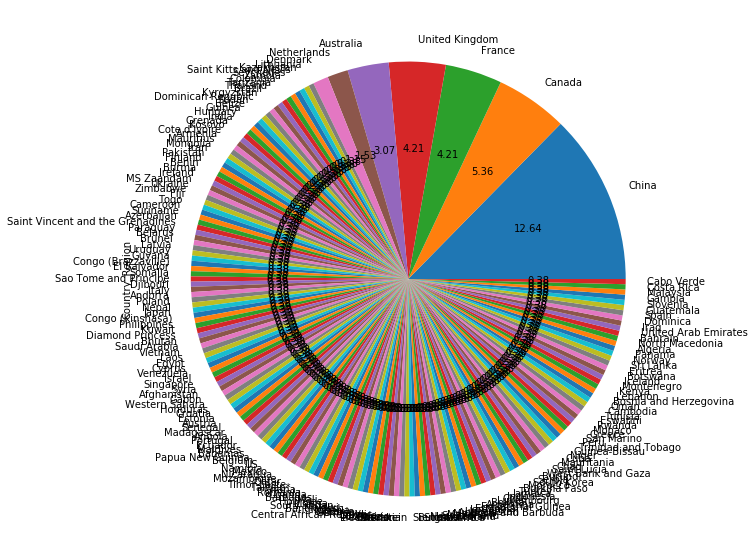

In [36]:
plt.figure(figsize = (80,10))
data['Country_Region'].value_counts().plot.pie(autopct='%.2f')

#Check for Distribution Map them with continetal
+Lat/Long
+Geometry/Point

In [37]:
dir(gpd)

['GeoDataFrame',
 'GeoSeries',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_config',
 '_version',
 'array',
 'base',
 'datasets',
 'geodataframe',
 'geopandas',
 'geoseries',
 'gpd',
 'io',
 'np',
 'options',
 'overlay',
 'pd',
 'plotting',
 'points_from_xy',
 'read_file',
 'read_postgis',
 'show_versions',
 'sjoin',
 'tools']

In [38]:
data.columns

Index(['Province_State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [39]:
#Convert Data to GeoDataFrame
gdf01 = gpd.GeoDataFrame(data,geometry=gpd.points_from_xy(data['Long'],data['Lat']))

In [40]:
gdf01.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0,POINT (65.00000 33.00000)
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0,POINT (20.16830 41.15330)
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0,POINT (1.65960 28.03390)
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0,POINT (1.52180 42.50630)
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0,POINT (17.87390 -11.20270)


In [41]:
type(gdf01)

geopandas.geodataframe.GeoDataFrame

In [42]:
#Method 2
points = [ Point(x,y) for x,y in zip(data.Long,data.Lat)]

In [43]:
gdf03 = gpd.GeoDataFrame(data,geometry=points)

In [44]:
gdf03

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,NaN,Afghanistan,33.00000,65.000000,1/22/20,0,0.0,0,POINT (65.00000 33.00000)
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0.0,0,POINT (20.16830 41.15330)
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0.0,0,POINT (1.65960 28.03390)
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0.0,0,POINT (1.52180 42.50630)
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0.0,0,POINT (17.87390 -11.20270)
...,...,...,...,...,...,...,...,...,...
20614,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,4/9/20,5,0.0,1,POINT (-59.52360 -51.79630)
20615,Saint Pierre and Miquelon,France,46.88520,-56.315900,4/9/20,1,0.0,0,POINT (-56.31590 46.88520)
20616,NaN,South Sudan,6.87700,31.307000,4/9/20,3,0.0,0,POINT (31.30700 6.87700)
20617,NaN,Western Sahara,24.21550,-12.885800,4/9/20,4,0.0,0,POINT (-12.88580 24.21550)


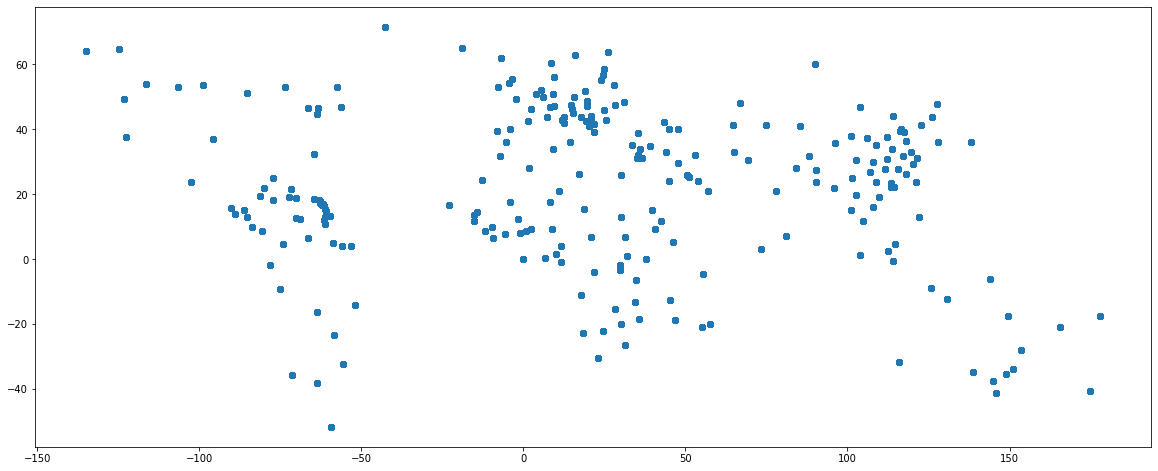

In [45]:
#Map Plot
gdf01.plot(figsize=(20,10))

(-198.0, 198.00000000000006, -98.6822565, 92.32738650000002)

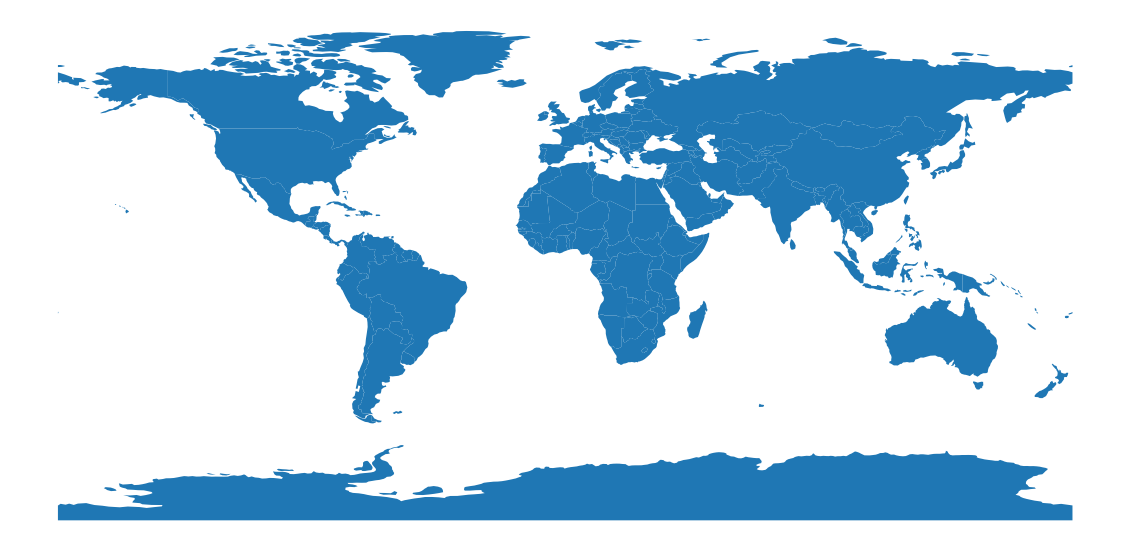

In [46]:
#overlaping with world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,10))
ax.axis('off')

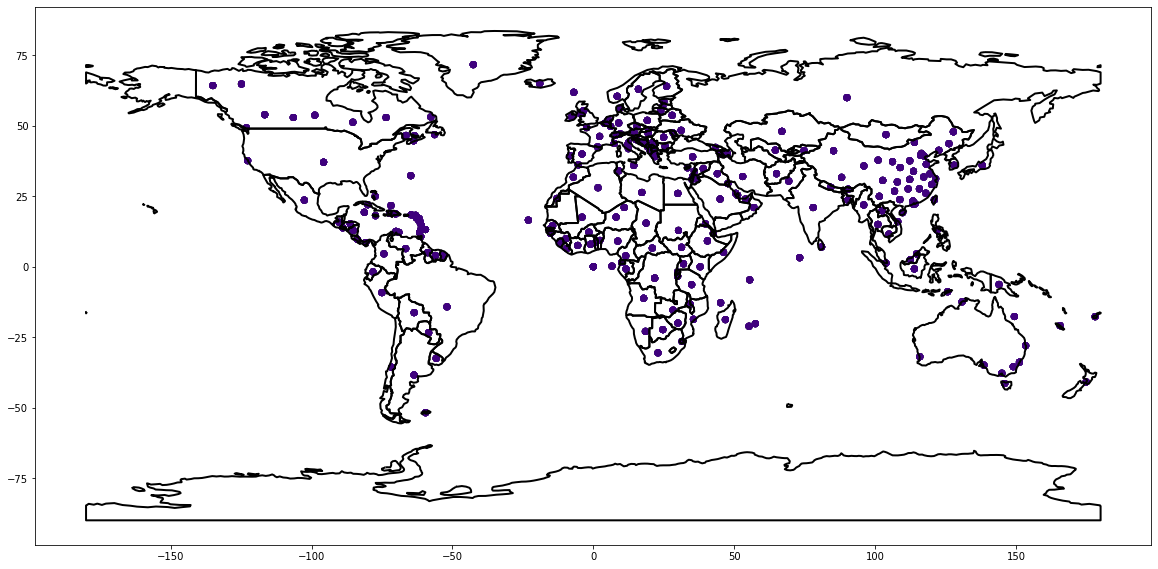

In [47]:
#Overlap
fig,ax = plt.subplots(figsize=(20,10))
gdf01.plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

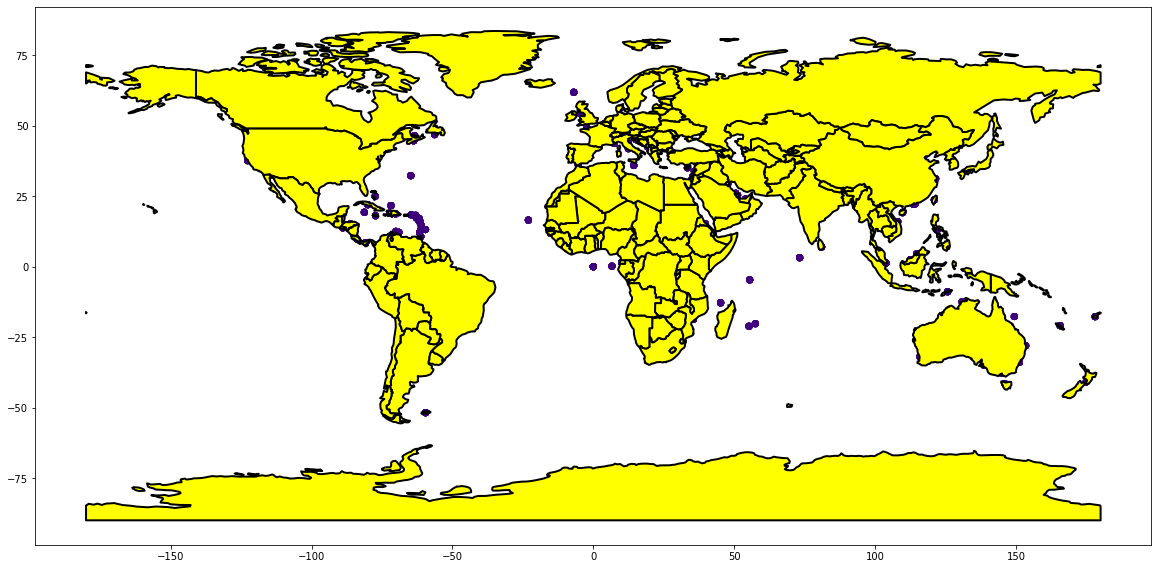

In [48]:
#Overlap
fig,ax = plt.subplots(figsize=(20,10))
gdf01.plot(cmap='Purples',ax=ax)
world.geometry.plot(color='yellow',edgecolor='k',linewidth=2,ax=ax)

In [49]:
#Per country
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [50]:
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

In [51]:
world['continent'].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [52]:
asia = world[world['continent'] == 'Asia']

In [53]:
asia

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
5,18556698,Asia,Kazakhstan,KAZ,460700.00,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.00,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
8,260580739,Asia,Indonesia,IDN,3028000.00,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
24,1291358,Asia,Timor-Leste,TLS,4975.00,"POLYGON ((124.96868 -8.89279, 125.08625 -8.656..."
76,8299706,Asia,Israel,ISR,297000.00,"POLYGON ((35.71992 32.70919, 35.54567 32.39399..."
77,6229794,Asia,Lebanon,LBN,85160.00,"POLYGON ((35.82110 33.27743, 35.55280 33.26427..."
79,4543126,Asia,Palestine,PSE,21220.77,"POLYGON ((35.39756 31.48909, 34.92741 31.35344..."
83,10248069,Asia,Jordan,JOR,86190.00,"POLYGON ((35.54567 32.39399, 35.71992 32.70919..."
84,6072475,Asia,United Arab Emirates,ARE,667200.00,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
85,2314307,Asia,Qatar,QAT,334500.00,"POLYGON ((50.81011 24.75474, 50.74391 25.48242..."


In [54]:
africa = world[world['continent'] == 'Africa']
north_america = world[world['continent'] == 'North America']
europe = world[world['continent'] == 'Europe']

In [55]:
#Caese in India
data.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0,POINT (65.00000 33.00000)
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0,POINT (20.16830 41.15330)
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0,POINT (1.65960 28.03390)
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0,POINT (1.52180 42.50630)
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0,POINT (17.87390 -11.20270)


In [56]:
data.columns

Index(['Province_State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'geometry'],
      dtype='object')

In [57]:
data[data['Country_Region'] == 'India']

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
131,NaN,India,21.0,78.0,1/22/20,0,0.0,0,POINT (78.00000 21.00000)
392,NaN,India,21.0,78.0,1/23/20,0,0.0,0,POINT (78.00000 21.00000)
653,NaN,India,21.0,78.0,1/24/20,0,0.0,0,POINT (78.00000 21.00000)
914,NaN,India,21.0,78.0,1/25/20,0,0.0,0,POINT (78.00000 21.00000)
1175,NaN,India,21.0,78.0,1/26/20,0,0.0,0,POINT (78.00000 21.00000)
...,...,...,...,...,...,...,...,...,...
19445,NaN,India,21.0,78.0,4/5/20,3588,99.0,229,POINT (78.00000 21.00000)
19706,NaN,India,21.0,78.0,4/6/20,4778,136.0,375,POINT (78.00000 21.00000)
19967,NaN,India,21.0,78.0,4/7/20,5311,150.0,421,POINT (78.00000 21.00000)
20228,NaN,India,21.0,78.0,4/8/20,5916,178.0,506,POINT (78.00000 21.00000)


In [58]:
gdf01[gdf01['Country_Region'] == 'India']

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
131,NaN,India,21.0,78.0,1/22/20,0,0.0,0,POINT (78.00000 21.00000)
392,NaN,India,21.0,78.0,1/23/20,0,0.0,0,POINT (78.00000 21.00000)
653,NaN,India,21.0,78.0,1/24/20,0,0.0,0,POINT (78.00000 21.00000)
914,NaN,India,21.0,78.0,1/25/20,0,0.0,0,POINT (78.00000 21.00000)
1175,NaN,India,21.0,78.0,1/26/20,0,0.0,0,POINT (78.00000 21.00000)
...,...,...,...,...,...,...,...,...,...
19445,NaN,India,21.0,78.0,4/5/20,3588,99.0,229,POINT (78.00000 21.00000)
19706,NaN,India,21.0,78.0,4/6/20,4778,136.0,375,POINT (78.00000 21.00000)
19967,NaN,India,21.0,78.0,4/7/20,5311,150.0,421,POINT (78.00000 21.00000)
20228,NaN,India,21.0,78.0,4/8/20,5916,178.0,506,POINT (78.00000 21.00000)


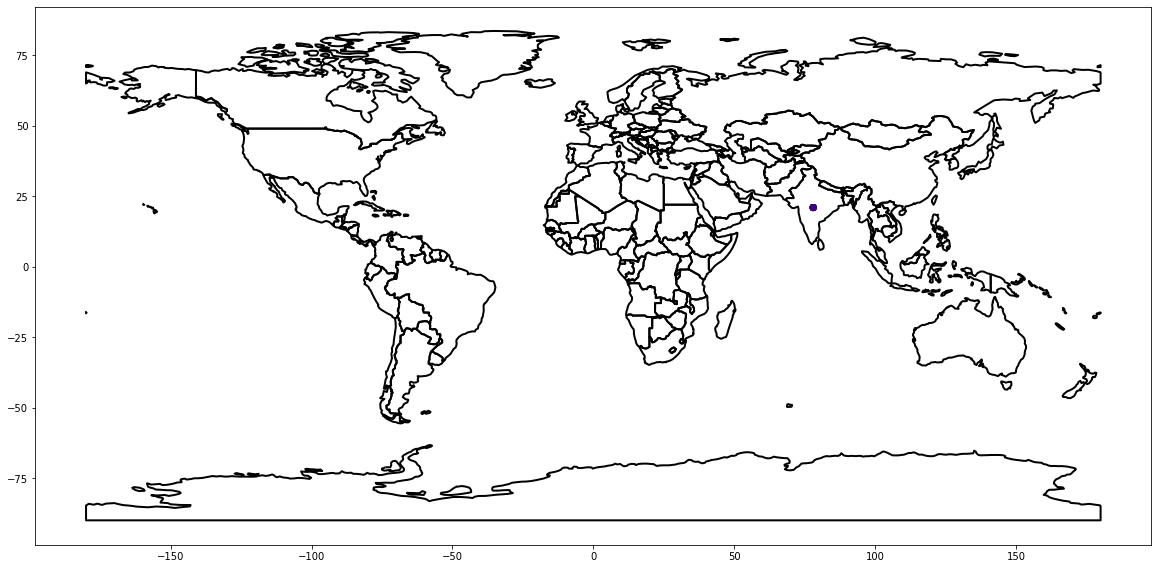

In [59]:
#Overlap
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country_Region'] == 'India'].plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

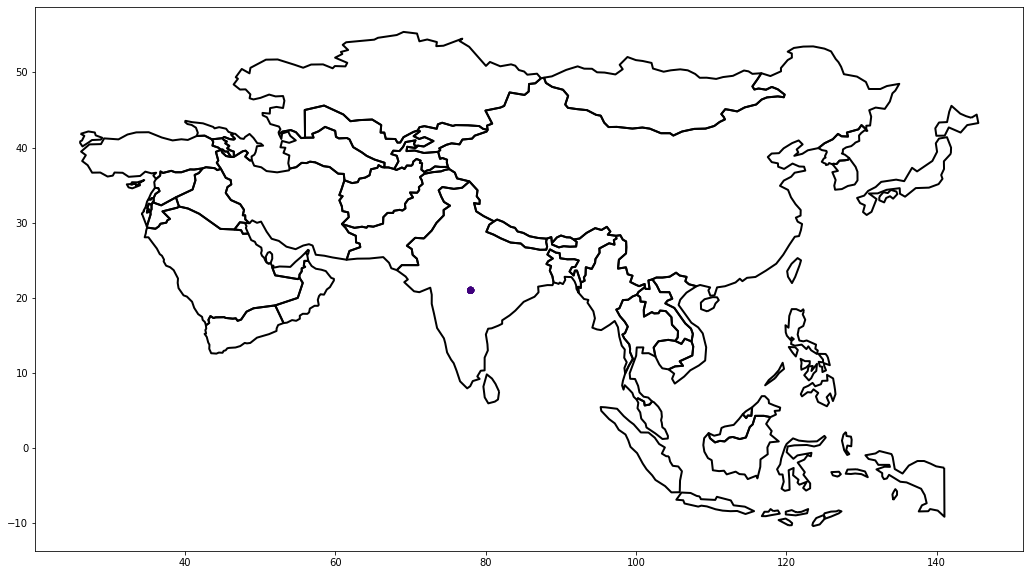

In [60]:
#Overlap
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country_Region'] == 'India'].plot(cmap='Purples',ax=ax)
asia.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [61]:
#Time Series Analaysis
data.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0,POINT (65.00000 33.00000)
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0,POINT (20.16830 41.15330)
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0,POINT (1.65960 28.03390)
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0,POINT (1.52180 42.50630)
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0,POINT (17.87390 -11.20270)


In [62]:
data_per_day

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17.0,28
1/23/20,444,17.0,28
1/24/20,549,24.0,31
1/25/20,761,40.0,32
1/26/20,1058,52.0,42
...,...,...,...
4/5/20,337072,15887.0,63945
4/6/20,366667,16523.0,64014
4/7/20,396223,17127.0,64073


In [63]:
#Copy
data2 = data

In [64]:
import datetime as dt

In [65]:
data['cases_date'] = pd.to_datetime(data2['Date'])

In [66]:
data2.dtypes

Province_State            object
Country_Region            object
Lat                      float64
Long                     float64
Date                      object
Confirmed                  int64
Deaths                   float64
Recovered                  int64
geometry                geometry
cases_date        datetime64[ns]
dtype: object

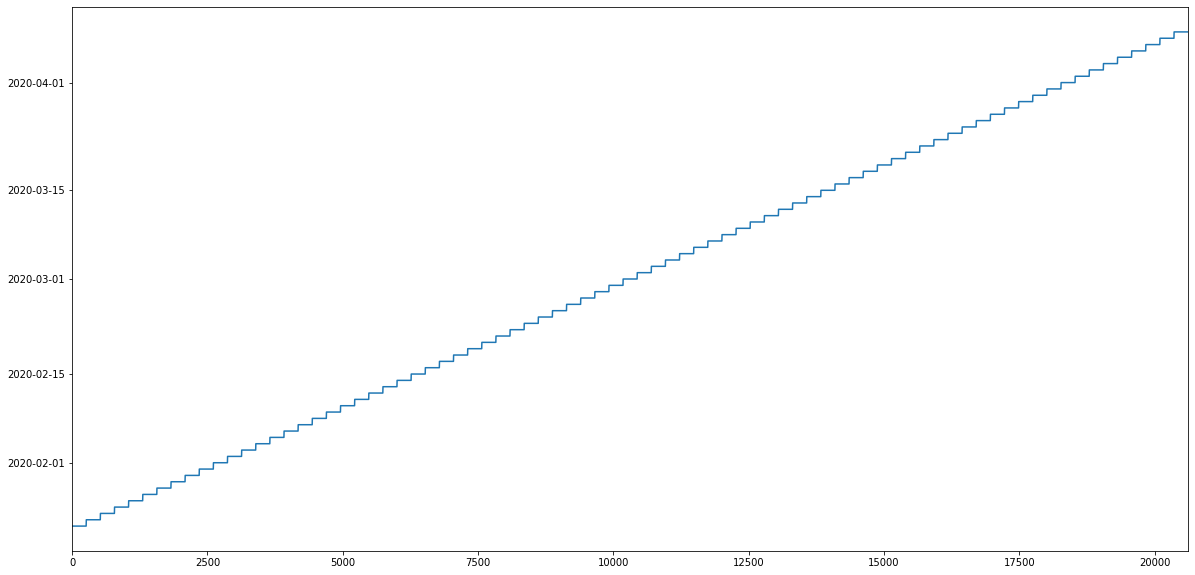

In [67]:
data['cases_date'].plot(figsize=(20,10))

In [68]:
df = data2.set_index('cases_date')

In [69]:
df

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
cases_date,,,,,,,,,
2020-01-22,NaN,Afghanistan,33.00000,65.000000,1/22/20,0,0.0,0,POINT (65.00000 33.00000)
2020-01-22,NaN,Albania,41.15330,20.168300,1/22/20,0,0.0,0,POINT (20.16830 41.15330)
2020-01-22,NaN,Algeria,28.03390,1.659600,1/22/20,0,0.0,0,POINT (1.65960 28.03390)
2020-01-22,NaN,Andorra,42.50630,1.521800,1/22/20,0,0.0,0,POINT (1.52180 42.50630)
2020-01-22,NaN,Angola,-11.20270,17.873900,1/22/20,0,0.0,0,POINT (17.87390 -11.20270)
...,...,...,...,...,...,...,...,...,...
2020-04-09,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,4/9/20,5,0.0,1,POINT (-59.52360 -51.79630)
2020-04-09,Saint Pierre and Miquelon,France,46.88520,-56.315900,4/9/20,1,0.0,0,POINT (-56.31590 46.88520)
2020-04-09,NaN,South Sudan,6.87700,31.307000,4/9/20,3,0.0,0,POINT (31.30700 6.87700)


In [70]:
#Select for Feburary
df.loc['2020-02']

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
cases_date,,,,,,,,,
2020-02-01,NaN,Afghanistan,33.00000,65.000000,2/1/20,0,0.0,0,POINT (65.00000 33.00000)
2020-02-01,NaN,Albania,41.15330,20.168300,2/1/20,0,0.0,0,POINT (20.16830 41.15330)
2020-02-01,NaN,Algeria,28.03390,1.659600,2/1/20,0,0.0,0,POINT (1.65960 28.03390)
2020-02-01,NaN,Andorra,42.50630,1.521800,2/1/20,0,0.0,0,POINT (1.52180 42.50630)
2020-02-01,NaN,Angola,-11.20270,17.873900,2/1/20,0,0.0,0,POINT (17.87390 -11.20270)
...,...,...,...,...,...,...,...,...,...
2020-02-29,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,2/29/20,0,0.0,0,POINT (-59.52360 -51.79630)
2020-02-29,Saint Pierre and Miquelon,France,46.88520,-56.315900,2/29/20,0,0.0,0,POINT (-56.31590 46.88520)
2020-02-29,NaN,South Sudan,6.87700,31.307000,2/29/20,0,0.0,0,POINT (31.30700 6.87700)


In [71]:
df.loc['2020-02-24':'2020-02-25']

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
cases_date,,,,,,,,,
2020-02-24,NaN,Afghanistan,33.00000,65.000000,2/24/20,1,0.0,0,POINT (65.00000 33.00000)
2020-02-24,NaN,Albania,41.15330,20.168300,2/24/20,0,0.0,0,POINT (20.16830 41.15330)
2020-02-24,NaN,Algeria,28.03390,1.659600,2/24/20,0,0.0,0,POINT (1.65960 28.03390)
2020-02-24,NaN,Andorra,42.50630,1.521800,2/24/20,0,0.0,0,POINT (1.52180 42.50630)
2020-02-24,NaN,Angola,-11.20270,17.873900,2/24/20,0,0.0,0,POINT (17.87390 -11.20270)
...,...,...,...,...,...,...,...,...,...
2020-02-25,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,2/25/20,0,0.0,0,POINT (-59.52360 -51.79630)
2020-02-25,Saint Pierre and Miquelon,France,46.88520,-56.315900,2/25/20,0,0.0,0,POINT (-56.31590 46.88520)
2020-02-25,NaN,South Sudan,6.87700,31.307000,2/25/20,0,0.0,0,POINT (31.30700 6.87700)


In [72]:
df.columns

Index(['Province_State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'geometry'],
      dtype='object')

In [77]:
df.loc['2020-02-24':'2020-02-25'][['Confirmed','Deaths', 'Recovered']].head(10)

,Confirmed,Deaths,Recovered
cases_date,,,
2020-02-24,1,0.0,0
2020-02-24,0,0.0,0
2020-02-24,0,0.0,0
2020-02-24,0,0.0,0
2020-02-24,0,0.0,0
2020-02-24,0,0.0,0
2020-02-24,0,0.0,0
2020-02-24,0,0.0,0
2020-02-24,0,0.0,0


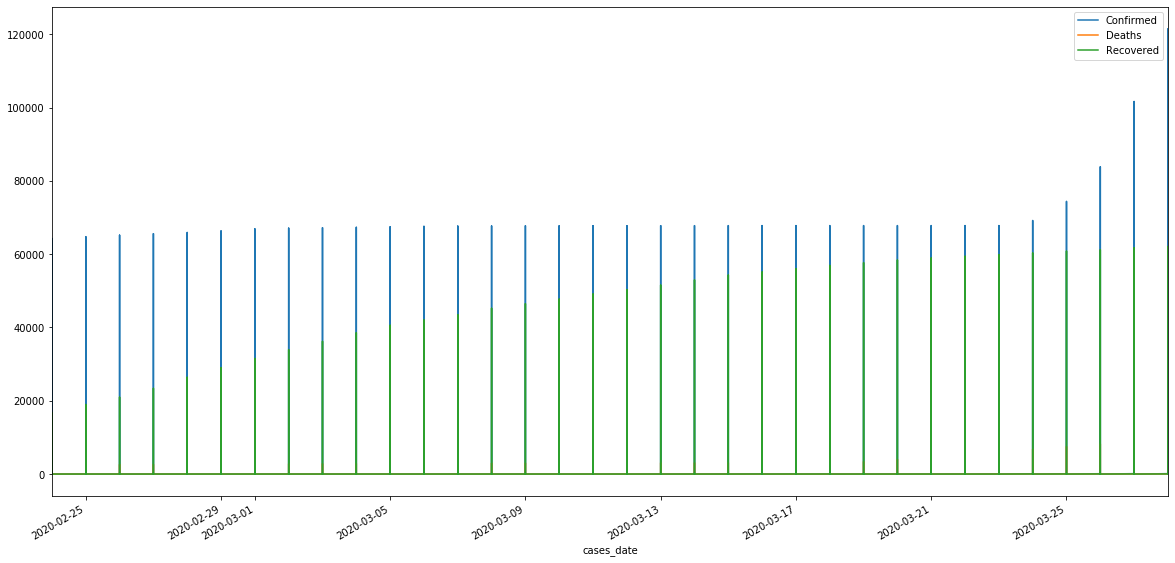

In [80]:
df.loc['2020-02-24':'2020-03-28'][['Confirmed','Deaths', 'Recovered']].plot(figsize=(20,10))

In [81]:
data_per_day = df.groupby(['cases_date']).sum().reset_index(drop=None)

In [82]:
data_per_day

,cases_date,Lat,Long,Confirmed,Deaths,Recovered
0,2020-01-22,5600.04289,5872.157373,555,17.0,28
1,2020-01-23,5600.04289,5872.157373,654,18.0,30
2,2020-01-24,5600.04289,5872.157373,941,26.0,36
3,2020-01-25,5600.04289,5872.157373,1434,42.0,39
4,2020-01-26,5600.04289,5872.157373,2118,56.0,52
...,...,...,...,...,...,...
74,2020-04-05,5600.04289,5872.157373,1272113,69373.0,256997
75,2020-04-06,5600.04289,5872.157373,1345099,74564.0,273256
76,2020-04-07,5600.04289,5872.157373,1426094,81864.0,296259
77,2020-04-08,5600.04289,5872.157373,1511102,88337.0,324502


In [83]:
data_per_day.columns

Index(['cases_date', 'Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

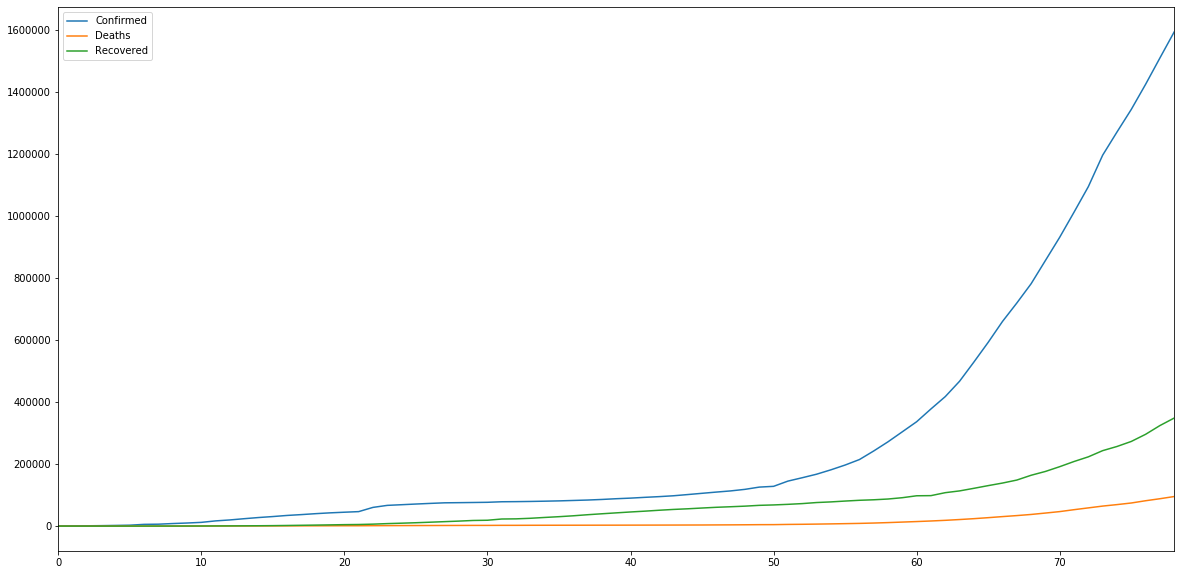

In [84]:
data_per_day[['Confirmed', 'Deaths', 'Recovered']].plot(figsize=(20,10))